In [4]:
from keras.datasets.mnist import load_data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = load_data()

In [6]:
print("訓練資料維度", x_train.shape)
print("測試資料維度", x_test.shape)

訓練資料維度 (60000, 28, 28)
測試資料維度 (10000, 28, 28)


ANS: 0


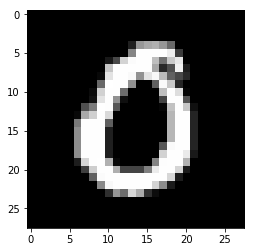

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print("ANS:", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [12]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,105,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,237,59,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,200,230,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,79,240,28,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,8,...,97,72,41,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,104,...,199,38,0,0,0,0,0,0,0,0


In [15]:
# 整理一下
# x進去前一定要常態化(好配合keras一開始隨機的那組weights)
# 還要攤開
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
# y進去的時候要one-hot encoding 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
#show
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一個中間層, 一定要告訴多少個輸入(input_dim)
mlp.add(Dense(128, input_dim=784, activation="relu"))
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 訓練前: 確定模型訓練方式
# 回歸:mse, 二元分類(ouput:1):binary_crossentropy, 多元分類(output > 1):categorical_crossentropy
mlp.compile(optimizer="adam", 
            loss="categorical_crossentropy", 
            metrics=["accuracy"])

In [25]:
# batch:看幾張圖做一次梯度下降
# epochs: 整個資料集看幾次
# epoch = 10, batch=200, 60000 * 10 / 200 = 3000梯度下降
mlp.fit(x_train_shape, 
        y_train_cat, 
        batch_size=200, 
        epochs=15, 
        validation_split=0.1,
        verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 1s - loss: 0.4360 - acc: 0.8827 - val_loss: 0.1971 - val_acc: 0.9452
Epoch 2/15
 - 1s - loss: 0.2035 - acc: 0.9421 - val_loss: 0.1393 - val_acc: 0.9643
Epoch 3/15
 - 1s - loss: 0.1487 - acc: 0.9574 - val_loss: 0.1196 - val_acc: 0.9692
Epoch 4/15
 - 1s - loss: 0.1171 - acc: 0.9665 - val_loss: 0.1043 - val_acc: 0.9715
Epoch 5/15
 - 1s - loss: 0.0968 - acc: 0.9727 - val_loss: 0.0973 - val_acc: 0.9722
Epoch 6/15
 - 1s - loss: 0.0813 - acc: 0.9767 - val_loss: 0.0877 - val_acc: 0.9752
Epoch 7/15
 - 1s - loss: 0.0688 - acc: 0.9806 - val_loss: 0.0833 - val_acc: 0.9753
Epoch 8/15
 - 1s - loss: 0.0591 - acc: 0.9837 - val_loss: 0.0816 - val_acc: 0.9763
Epoch 9/15
 - 1s - loss: 0.0510 - acc: 0.9857 - val_loss: 0.0759 - val_acc: 0.9787
Epoch 10/15
 - 1s - loss: 0.0444 - acc: 0.9876 - val_loss: 0.0736 - val_acc: 0.9795
Epoch 11/15
 - 1s - loss: 0.0382 - acc: 0.9900 - val_loss: 0.0736 - val_acc: 0.9787
Epoch 12/15
 - 1s - loss: 0.0347 - a

In [26]:
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 20us/step


[0.07044137238785625, 0.9788]

In [28]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.DataFrame(confusion_matrix(y_test, mlp.predict_classes(x_test_shape)))

,0,1,2,3,4,5,6,7,8,9
0,969,0,1,2,1,1,2,1,3,0
1,0,1124,4,1,0,1,1,0,4,0
2,4,1,1013,1,1,0,1,6,5,0
3,0,0,4,990,1,2,0,3,1,9
4,0,0,0,1,967,0,8,2,0,4
5,2,1,0,14,2,862,4,0,5,2
6,6,3,1,1,2,3,940,1,1,0
7,0,6,10,2,0,0,0,999,1,10
8,2,0,4,9,4,2,2,2,948,1
9,1,4,0,6,14,3,0,2,3,976


你想要判斷的圖片名稱:test2.png
預測結果: [3]


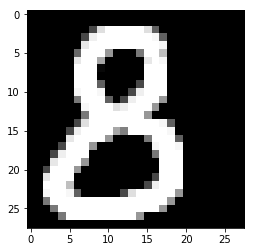

In [37]:
# Pillow
from PIL import Image
import numpy as np
fn = input("你想要判斷的圖片名稱:")
img1 = np.array(Image.open(fn).resize((28, 28)).convert("L"))
x_pre = np.array([img1]).reshape(1, 784) / 255
print("預測結果:", mlp.predict_classes(x_pre))
plt.imshow(img1, cmap="gray")